# Bike Sharing Prediction Multiple Regression Model

This assignment is a programming assignment wherein you I have build a multiple linear regression model for the prediction of demand for shared bikes.

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike    demands across the American market based on some factors. 

## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Data Preparation:

1. You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
2. You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

## Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. 

The model should be built taking this 'cnt' as the target variable.

## Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.
 

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
 

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.


# Data understanding, preparation and EDA

## Data Understanding

In [101]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [102]:
# Read data from day dataset in dataframe
bikesharingdf = pd.read_csv("day.csv")
pd.set_option('display.max_columns', None)

# Check the head of the dataset
bikesharingdf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
#check number of rows and columns
bikesharingdf.shape

(730, 16)

In [104]:
# describing the columns of dataframe
bikesharingdf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [105]:
# get the info about columns - Finding any missing value
bikesharingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [106]:
# renaming few columns for better readibility
bikesharingdf.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [107]:
# Check the head of the dataset
bikesharingdf.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Quality Checks

In [108]:
# Looks there is no null so lets check for duplicates and drop them
# dropping the duplicates

bikesharingdf.drop_duplicates(inplace=True)

In [109]:
# re-verifying the shape of new dataframe
bikesharingdf.shape

(730, 16)

In [110]:
# Shape is still same so looks no duplicates are found

In [111]:
# Lets look if there is any column which is of no use
# instant has only index for the row - Lets frop this

# similarly dteday has date which looks not of use as year and month will serve our purpose(Again just athought- lets try)
# casual and registered seems to be the breakup by category for cnt column.

bikesharingdf.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [112]:
# re-verifying the shape of new dataframe -After 4 column should be dropped
bikesharingdf.shape

(730, 12)

In [113]:
# Mapping Season column as per details mentioned in data dictionary -
bikesharingdf.season = bikesharingdf.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [114]:
# re-verifying the shape of dataframe
bikesharingdf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [115]:
# Mapping the month column
bikesharingdf.month = bikesharingdf.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [116]:
# re-verifying the shape of dataframe
bikesharingdf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [117]:
# Mapping the weekday column
bikesharingdf.weekday = bikesharingdf.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [118]:
# re-verifying the shape of dataframe
bikesharingdf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [119]:
# Mapping the weathersit column
bikesharingdf.weathersit = bikesharingdf.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [120]:
# re-verifying the shape of dataframe
bikesharingdf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [121]:
# Stastistical summarry
# Lets check stastistical summarry of numerical variables
bikesharingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Data Visualization
    # 1. Lets check if there is any linear relationship between columns or not 
    # 2. Would like to see if there is multiple regression model - by seeing multiple variance

## Data Preparation

### Categorical Variables

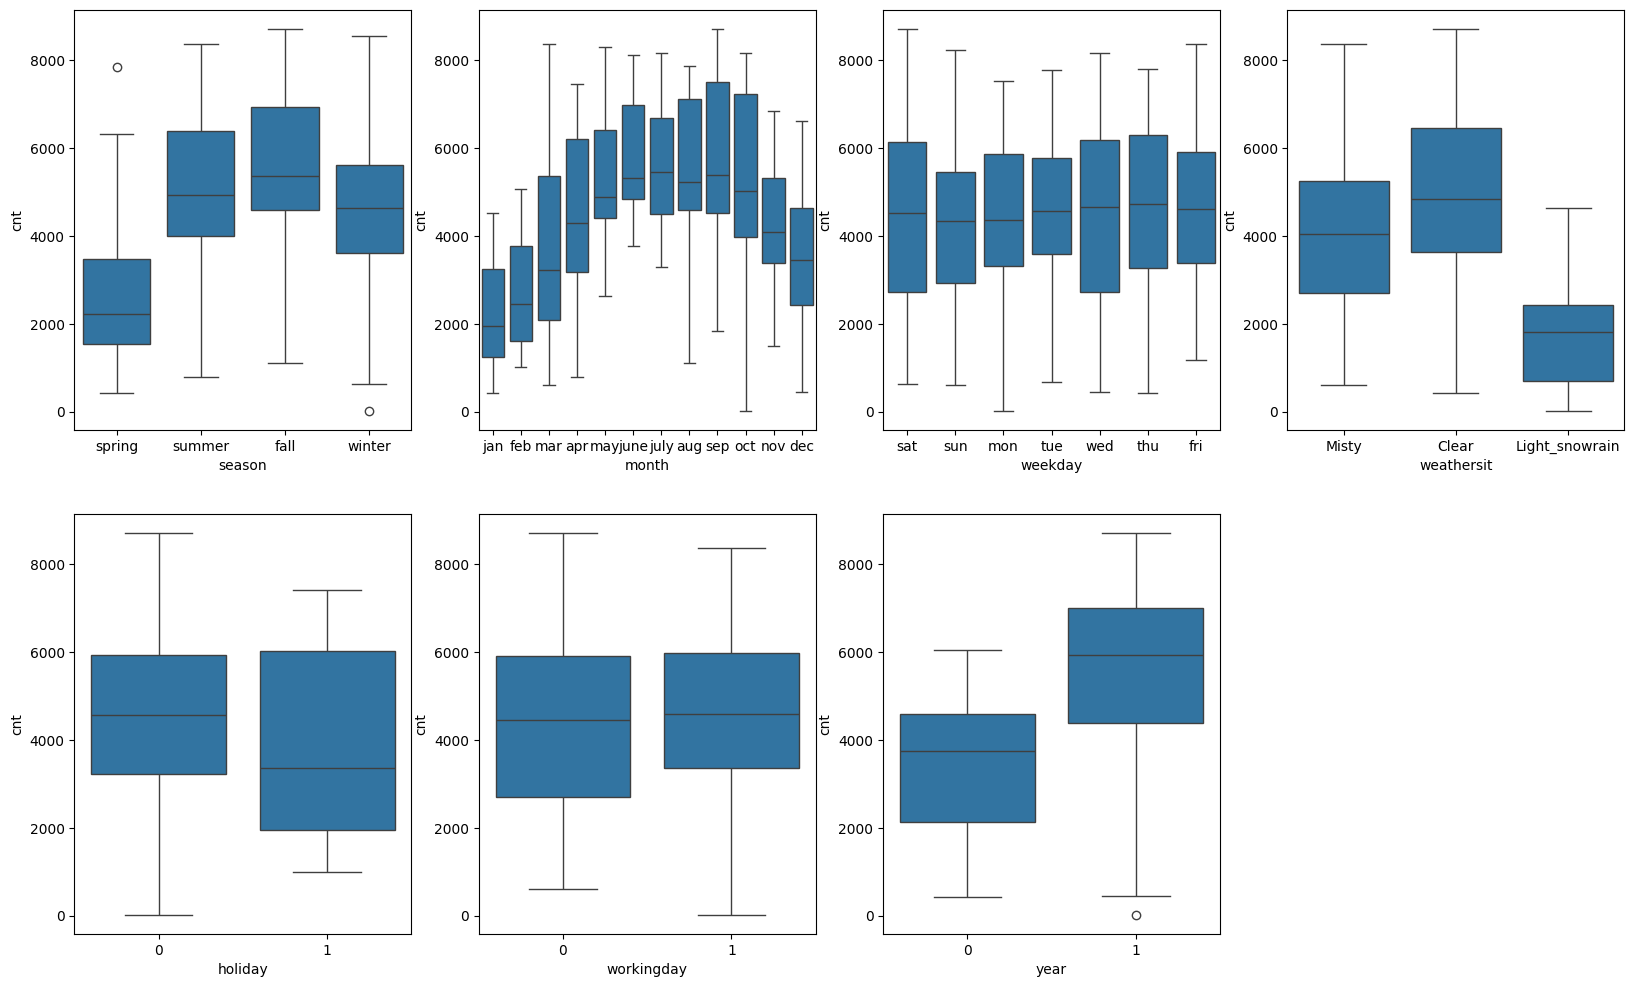

In [122]:
# Analysing/visualizing the categorical variables -  to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharingdf)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bikesharingdf)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharingdf)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharingdf)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharingdf)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharingdf)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bikesharingdf)
plt.show()

In [123]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(data=bikesharingdf, x=column, y='cnt', color='magenta')
    plt.subplot(1,2,2)
    sns.barplot(data=bikesharingdf, x=column, y='cnt', color='pink', hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

### Visualization through Scatter Plot

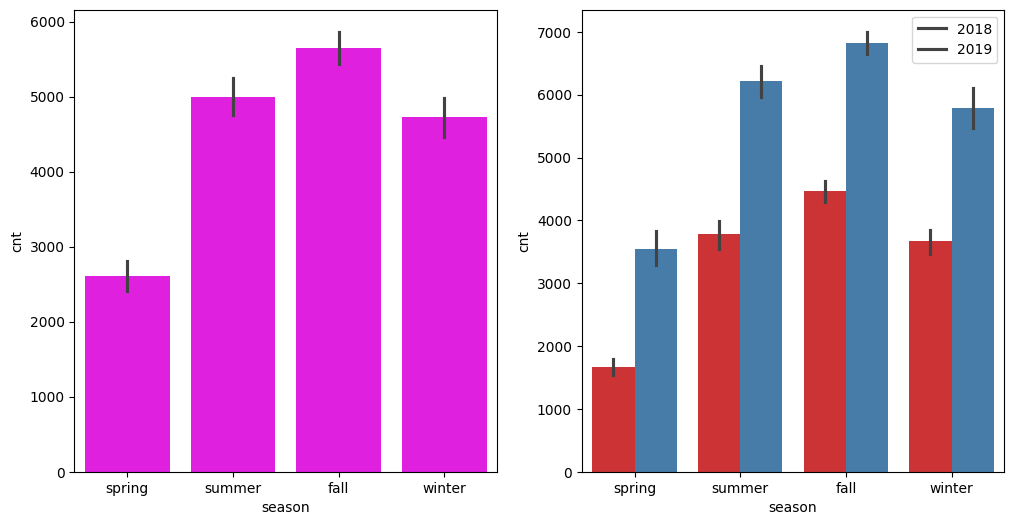

In [124]:
# Plotted Visualization for Season Cloumn
plot_cat_columns('season')

#Observation  - Here looks like Fall season has most number of bookings. Can observe the trend that in 2019 it is way better than 2018

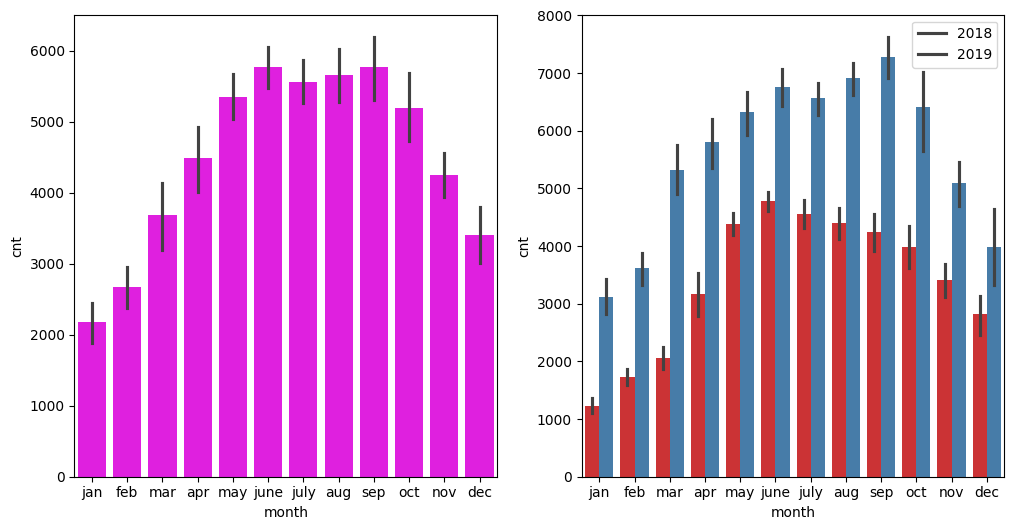

In [125]:
# Plotted Visualization for month Cloumn
plot_cat_columns('month')

#Observation - Most of the bookings has been done during the month of may, june, july, aug, sep and oct.
#Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. 
#Number of booking for each month seems to have increased from 2018 to 2019.

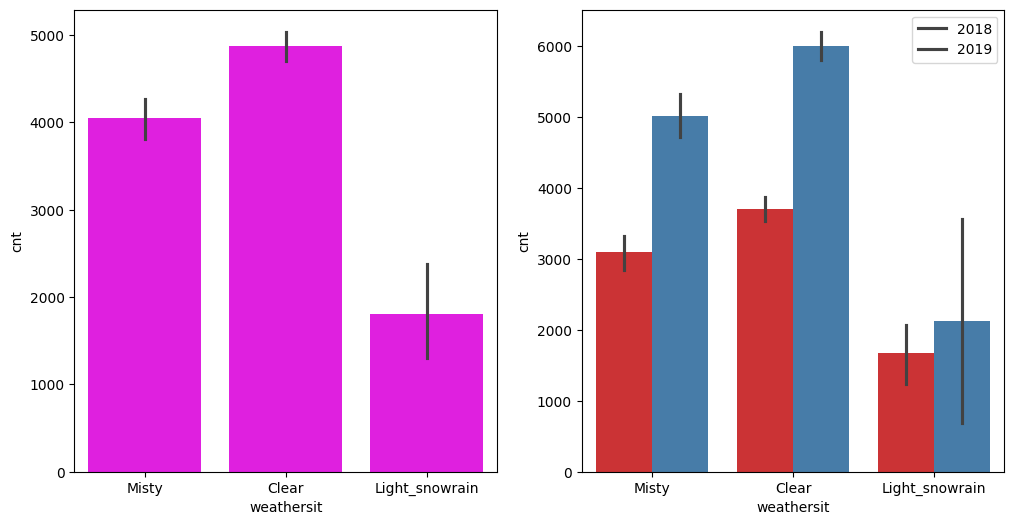

In [126]:
# plotting visualization for weathersit column
plot_cat_columns('weathersit')

#Observation - Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

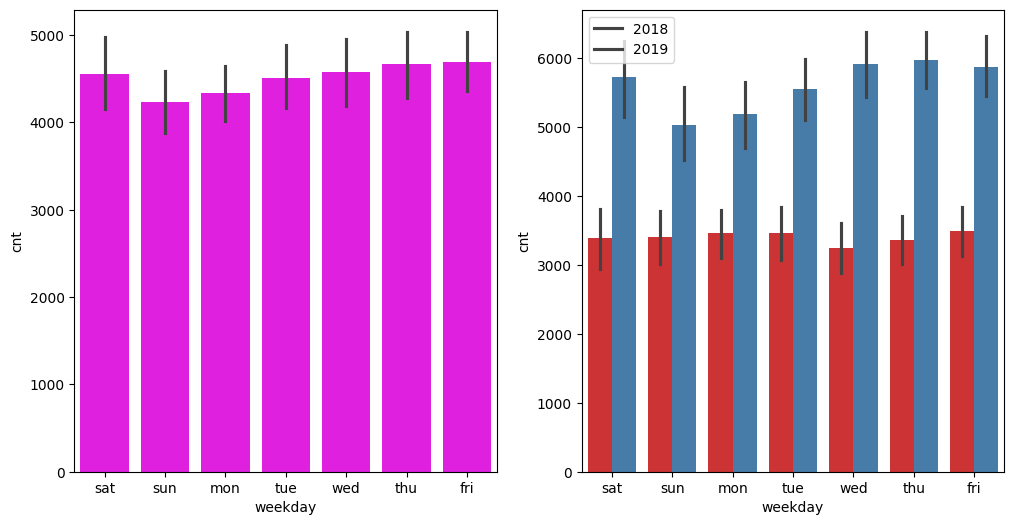

In [127]:
# plotting visualization for weekday column
plot_cat_columns('weekday')

#Observation - Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

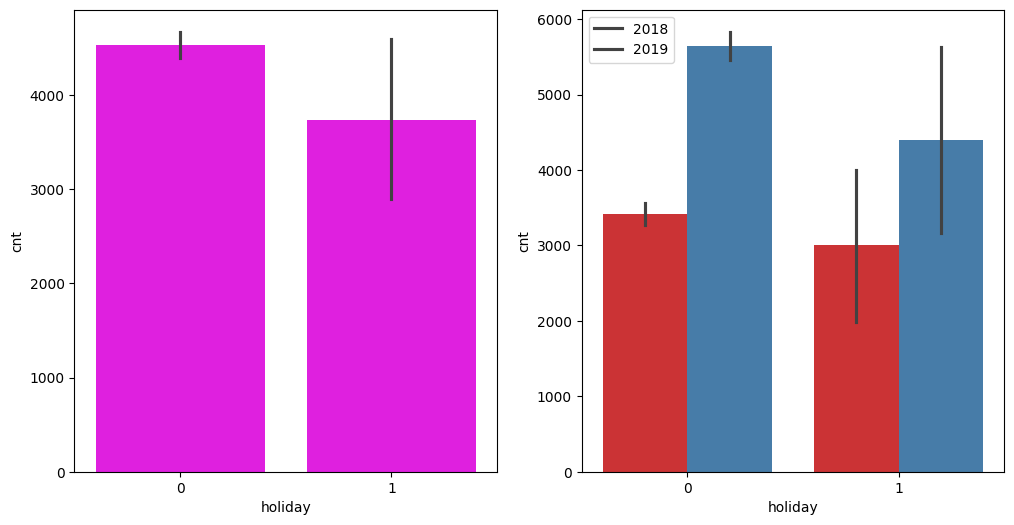

In [128]:
# plotting visualization for holiday column
plot_cat_columns('holiday')

#Observation - When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

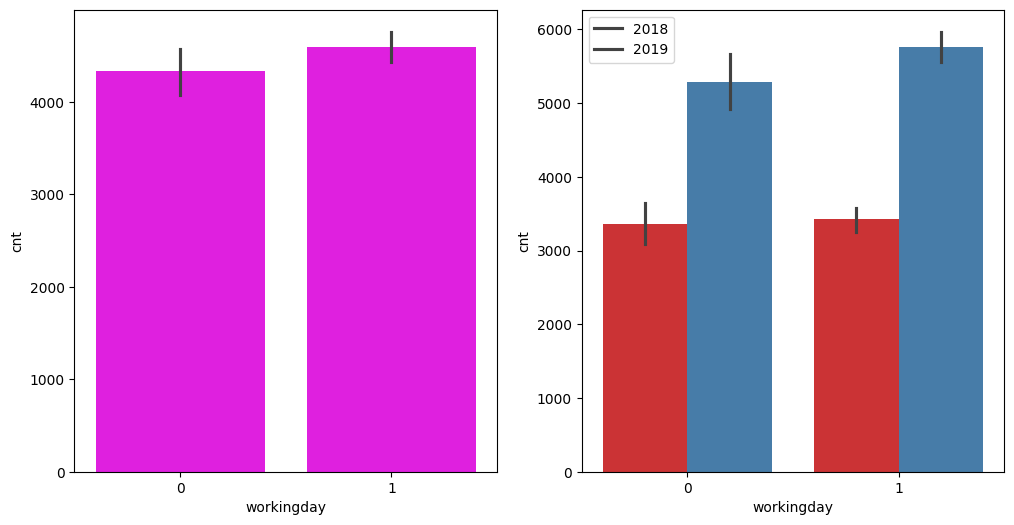

In [129]:
# plotting visualization for workingday column
plot_cat_columns('workingday')

#Observation - Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

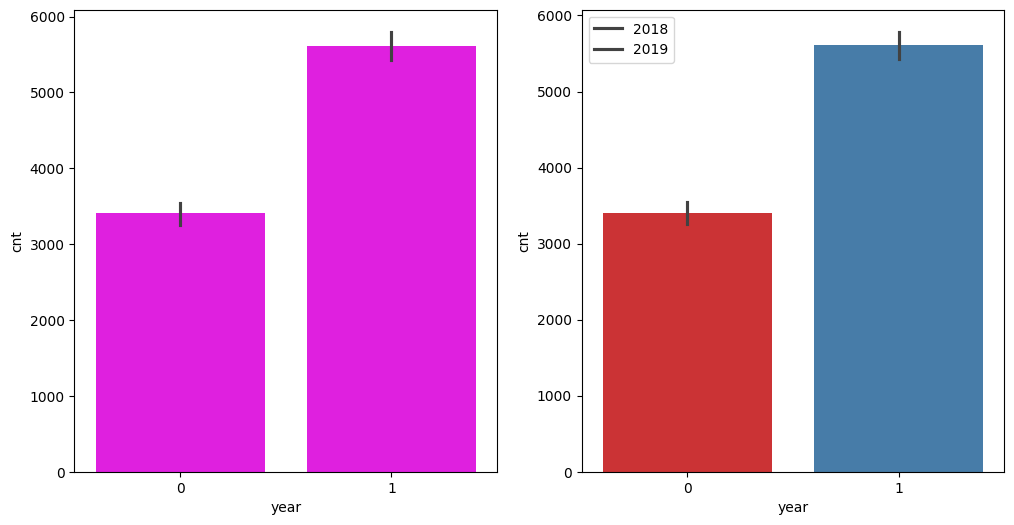

In [130]:
# plotting visualization for year column
plot_cat_columns('year')

#Observation - 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

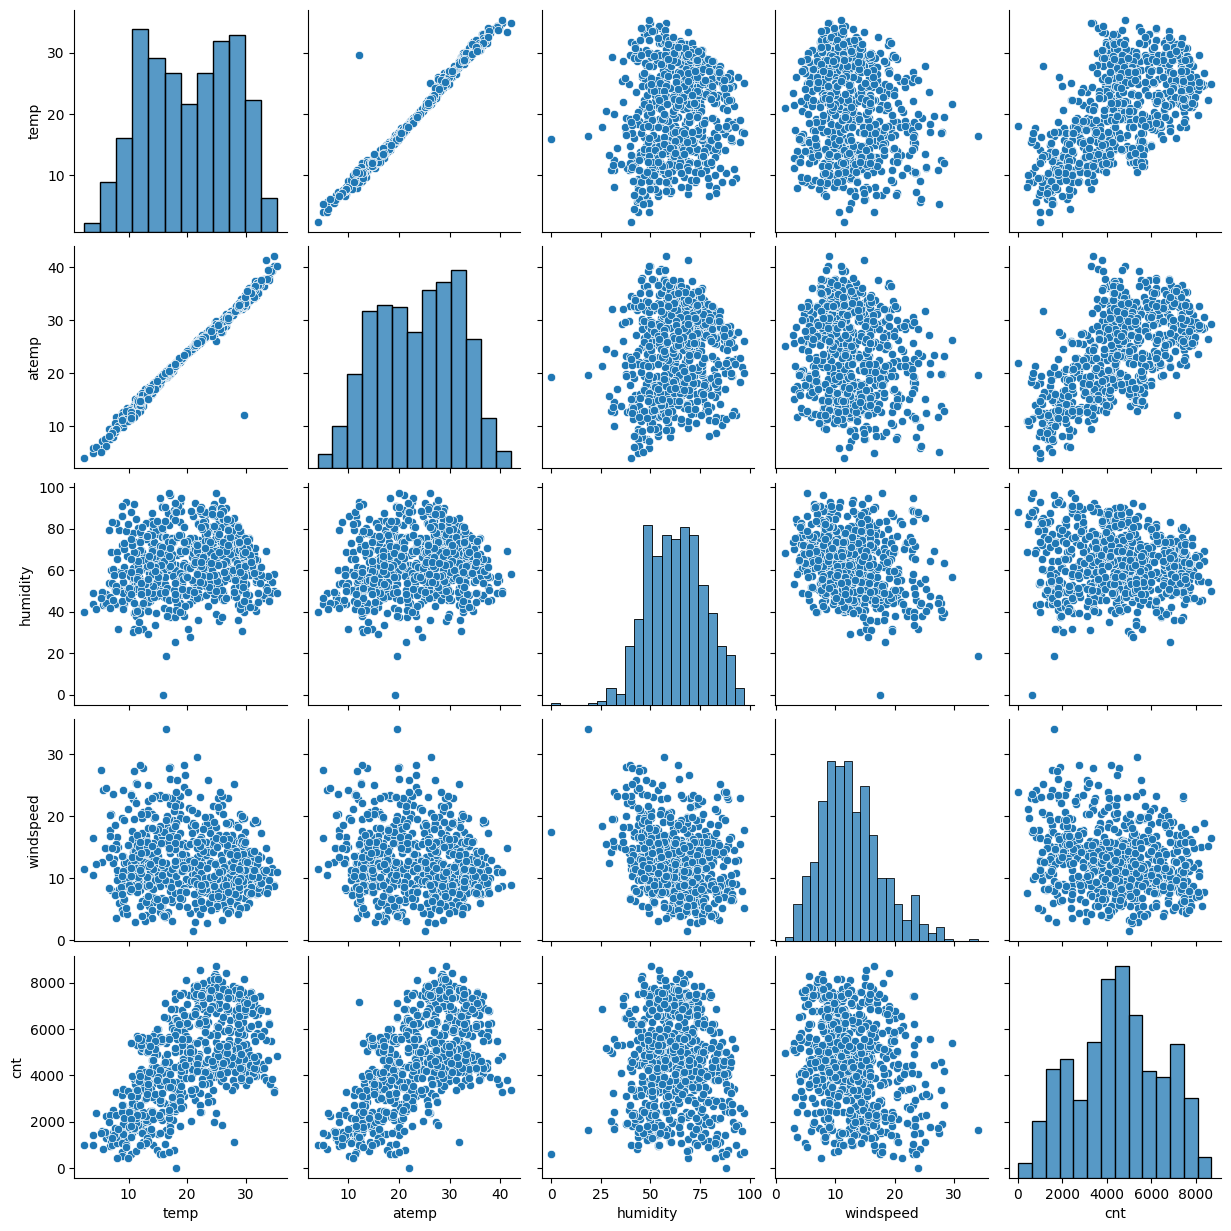

In [131]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bikesharingdf,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

### Analysing/visualizing the numerical columns

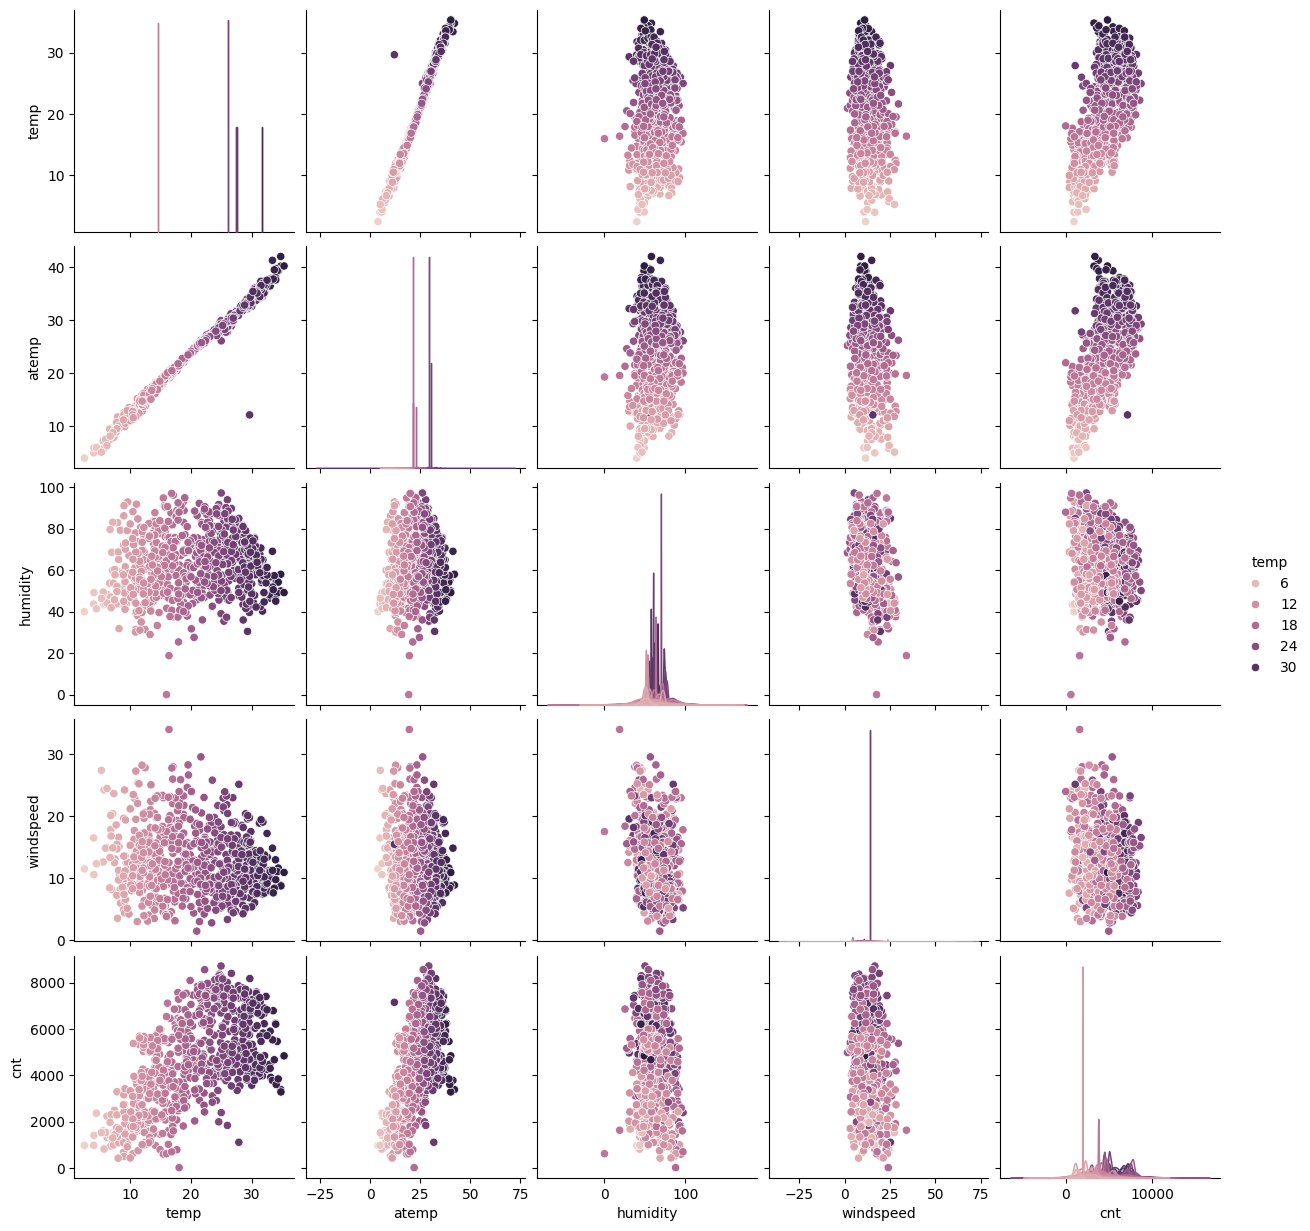

In [132]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=bikesharingdf,vars=['temp','atemp','humidity','windspeed','cnt'], hue="temp")
plt.show()

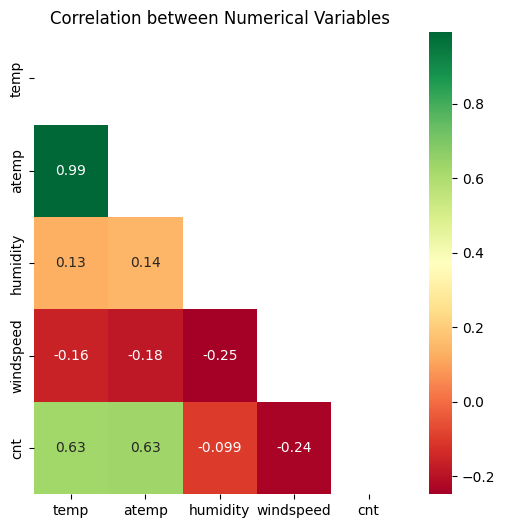

In [133]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bikesharingdf[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bikesharingdf[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

### Dummy variable 

In [134]:
#Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bikesharingdf.month,drop_first=True)
weekdays_df=pd.get_dummies(bikesharingdf.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bikesharingdf.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bikesharingdf.season,drop_first=True)

In [135]:
# checking head
bikesharingdf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [136]:
# Merging  the dataframe, with the dummy variable dataset. 
bikesharingdf_new = pd.concat([bikesharingdf,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [137]:
# checking shape
bikesharingdf_new.shape

(730, 34)

In [138]:
# checking info
bikesharingdf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [139]:
# checking head
bikesharingdf_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False


In [140]:
#replace all True/False to 0/1
bikesharingdf_new.replace({False: 0, True: 1}, inplace=True)
bikesharingdf_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [141]:
# dropping columns for which we created dummy variables
bikesharingdf_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [142]:
# checking head of new dataframe
bikesharingdf_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [143]:
# checking shape of new dataframe
bikesharingdf_new.shape

(730, 30)

# Model Building & Evaluation

## Train & Test Split

In [144]:
# Splitting Data into Train & Test ( 70 % train data rest test)
np.random.seed(0)
bikesharingdf_train, bikesharingdf_test = train_test_split(bikesharingdf_new, train_size = 0.7, random_state = 100)

In [145]:
# Check the shape of training datatset
bikesharingdf_train.shape

(510, 30)

In [146]:
# Check the shape of test datatset
bikesharingdf_test.shape

(220, 30)

## Rescaling

### MinMaxScaler

In [147]:
# MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [148]:
# verifying before scale
bikesharingdf_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [149]:
# Apply scaler() - to numeric cplumns
num_vars = ['temp','atemp','humidity','windspeed','cnt']
bikesharingdf_train[num_vars] = scaler.fit_transform(bikesharingdf_train[num_vars])

In [150]:
# verifying after scale
bikesharingdf_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [151]:
bikesharingdf_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


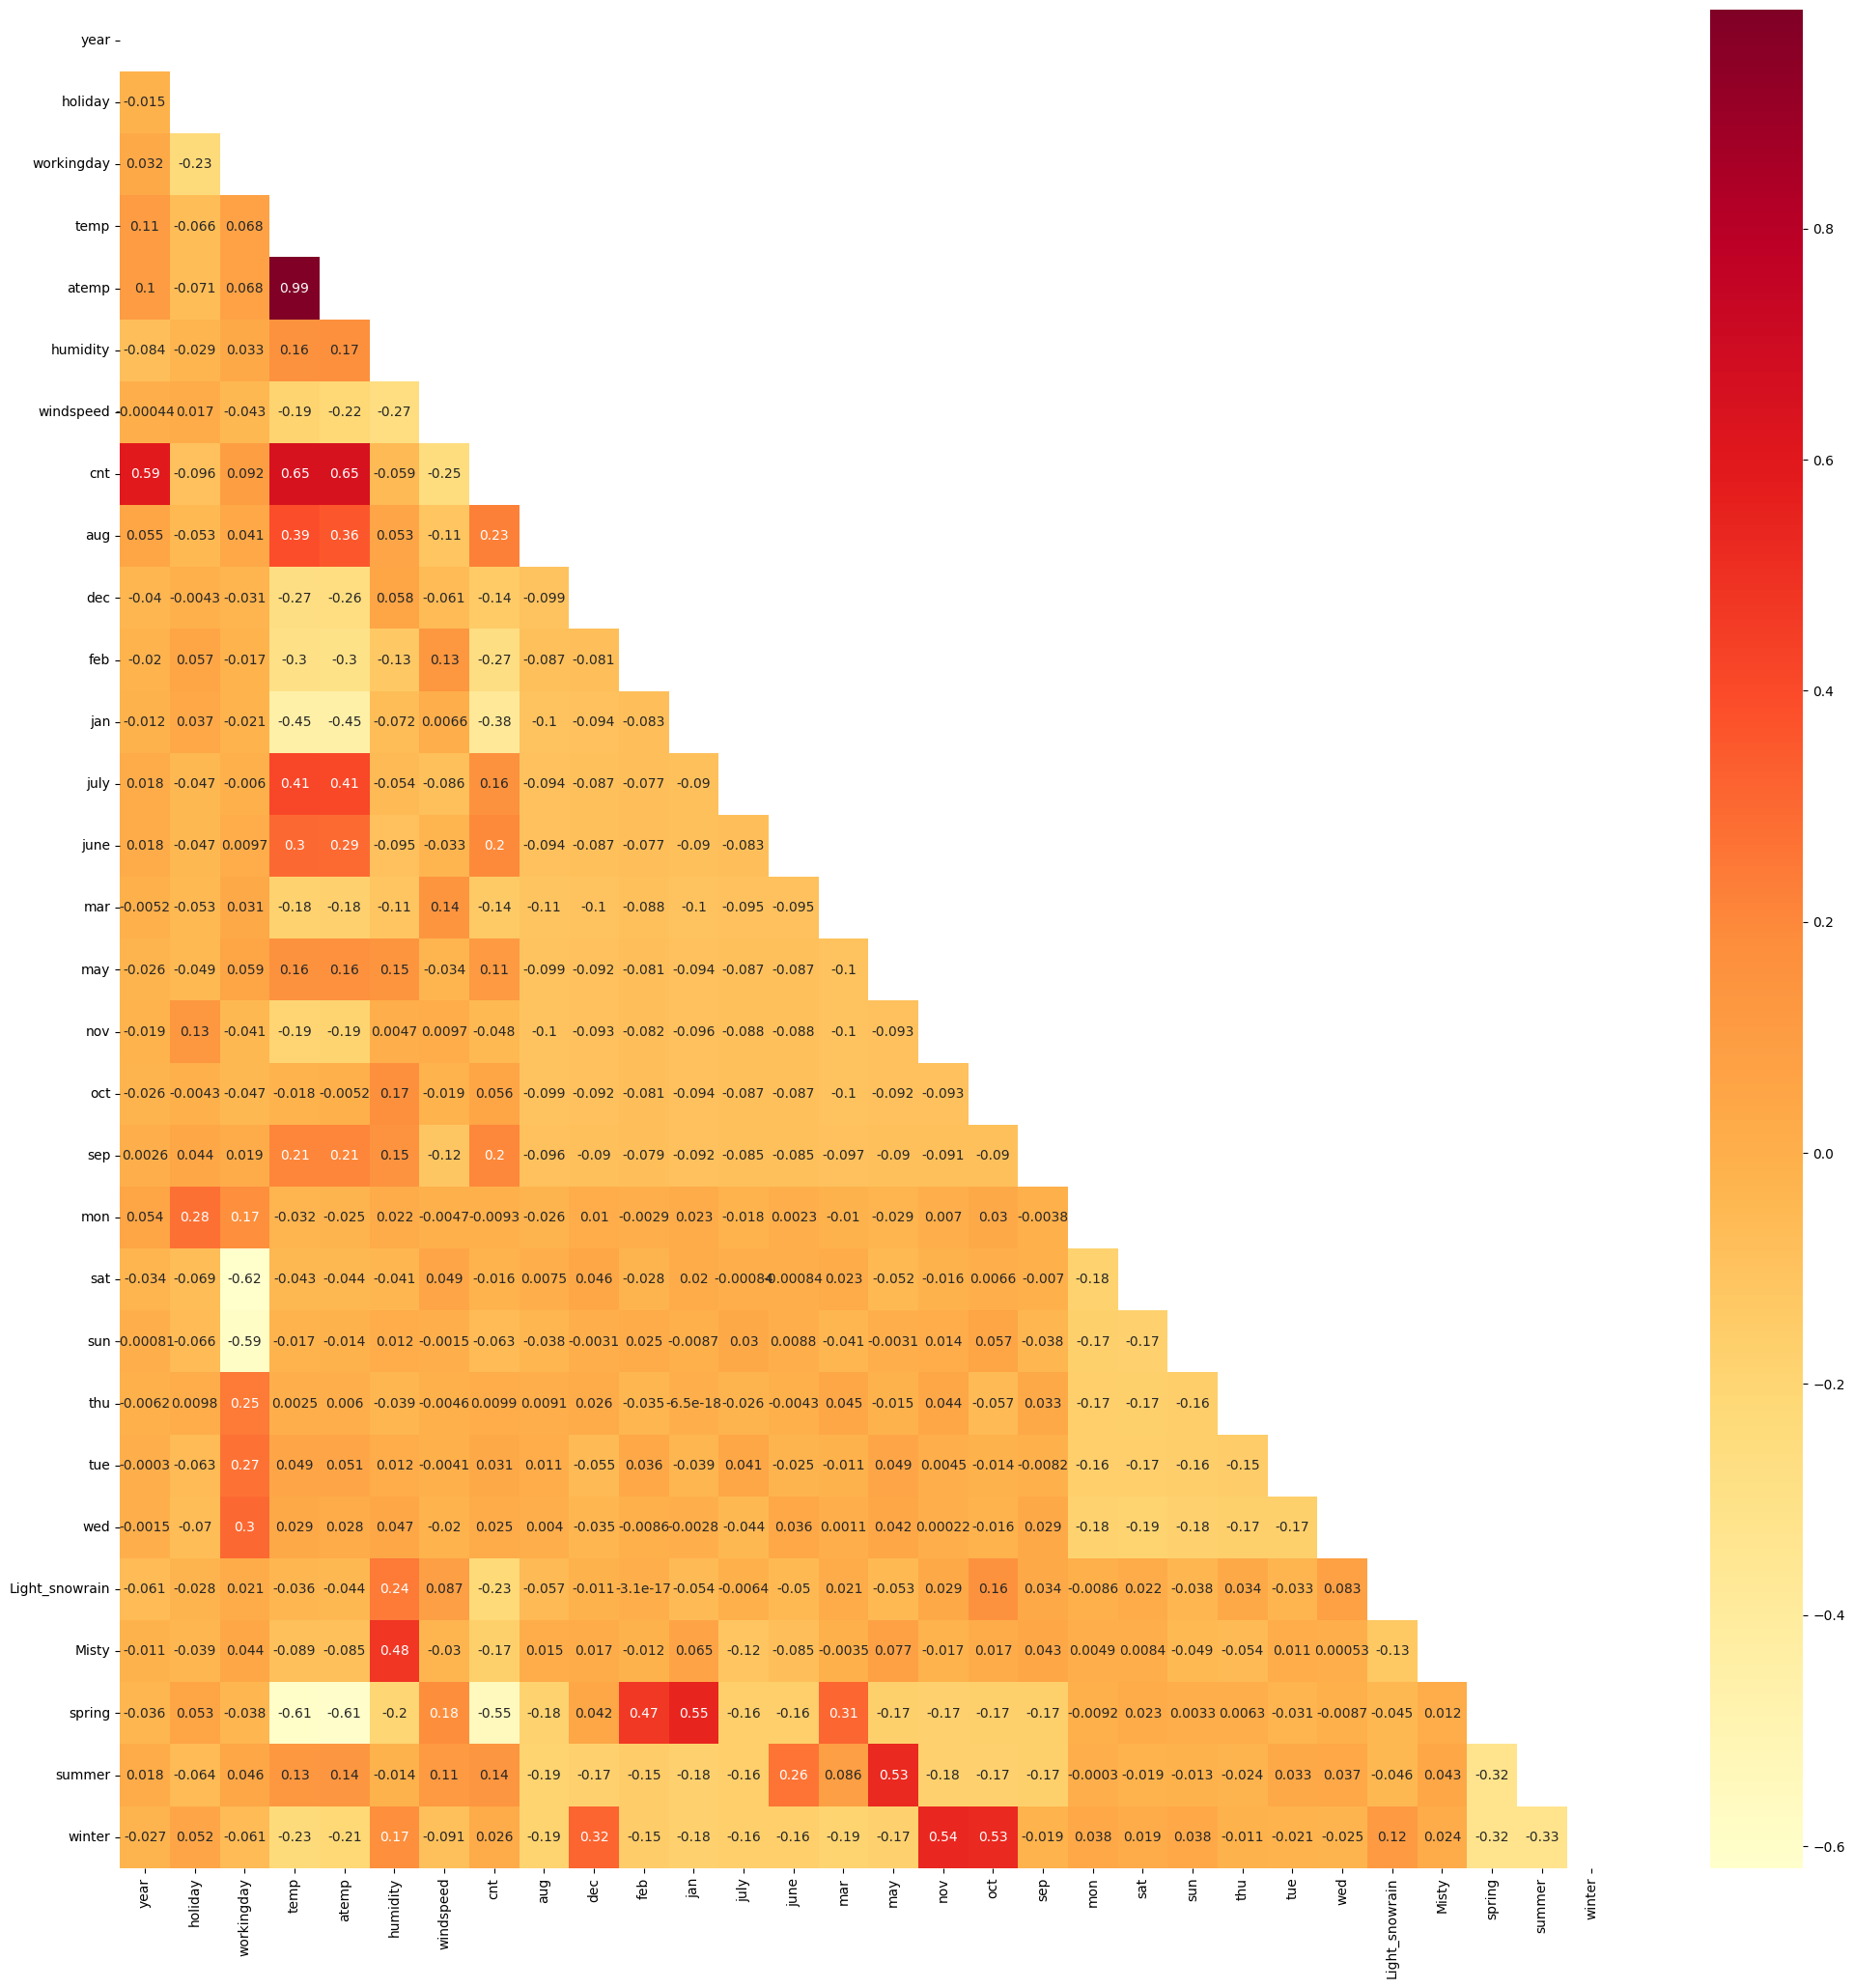

In [152]:
# Correltion Coeff Value
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(bikesharingdf_train.corr())
sns.heatmap(bikesharingdf_train.corr(), annot = True, cmap="YlOrRd", mask=matrix)
plt.show()

In [153]:
#cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

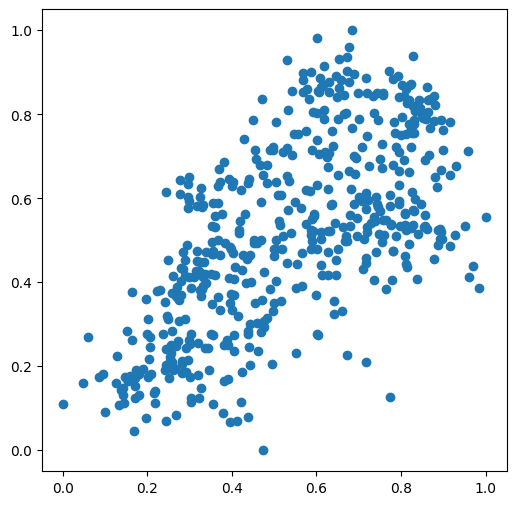

In [154]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bikesharingdf_train.temp, bikesharingdf_train.cnt)
plt.show()

In [155]:
# Looks Positive Correlation Between tmp & cnt
# Lets Create Model Now

# Model Building

In [156]:
# Building the Linear Model
y_train = bikesharingdf_train.pop('cnt')
X_train = bikesharingdf_train

## RFE -  Recursive feature elimination 

In [157]:
# RFE -  Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [158]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [159]:
# Adding columns with rfe support =True:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [160]:
# Eliminating or removing columns with rfe support = False:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [161]:
# VIF Calculation
def calculateVIF(bikesharingdf):
    vif = pd.DataFrame()
    vif['Features'] = bikesharingdf.columns
    vif['VIF'] = [variance_inflation_factor(bikesharingdf.values, i) for i in range(bikesharingdf.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [162]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

## VIF Calculation

In [163]:
# calculate VIF
calculateVIF(X_train_rfe.astype(float))

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Misty,1.57


## Building 1st linear regression model

In [164]:
#Add constant 
X_train_lm_1 = sm.add_constant(X_train_rfe)

#build model using statsmodel
lr_1 = sm.OLS(y_train,X_train_lm_1.astype(float)).fit()

#check result of model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.11e-191
Time:                        01:40:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [165]:
# Remove High Std err which is humidity 

# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new.astype(float))

,Features,VIF
2,workingday,35.88
7,sat,8.96
8,sun,8.41
11,spring,4.96
3,temp,3.39
13,winter,3.35
12,summer,2.60
1,holiday,2.34
5,july,1.48
6,sep,1.29


## Building 2nd linear regression model

In [166]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2.astype(float)).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.28e-188
Time:                        01:40:17   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1355      0.024      5.

In [167]:
X_train_new

,year,holiday,workingday,temp,windspeed,july,sep,sat,sun,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.264686,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,1,0,0,1,1,0,0
728,1,0,0,0.245101,0.663106,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.188475,0,0,1,0,0,1,0,1,0
111,0,0,1,0.345824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.431816,0,0,1,0,0,1,0,0,1
79,0,0,1,0.462664,0.529881,0,0,0,0,0,1,0,1,0


In [168]:
# Remove High P-value variable 'holiday'
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new.astype(float))

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
6,sat,4.45
7,sun,4.21
10,spring,3.82
12,winter,2.78
11,summer,2.76
0,year,2.07
4,july,1.60


## Building 3rd linear regression model

In [169]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3.astype(float)).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.28e-188
Time:                        01:40:17   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1008      0.038      2.

In [170]:
# Remove High P-value variable 'sun'
X_train_new = X_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new.astype(float))

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
8,Misty,1.57


## Building 4th linear regression model

In [171]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4.astype(float)).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          7.12e-189
Time:                        01:40:17   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

In [172]:
# Remove High P-value variable 'july'
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new.astype(float))

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


## Building 5th linear regression model

In [173]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5.astype(float)).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.42e-188
Time:                        01:40:17   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

In [174]:
# Remove High P-value variable 'spring'
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new.astype(float))

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_snowrain,1.08


## Building 6th linear regression model -Final Model

In [175]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6.astype(float)).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.13e-188
Time:                        01:40:17   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

In [176]:
# This looks a good model as P-value has become 0 for all variance and VIF is below 5 so that also looks good

## Multicolinearity

In [177]:
#We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

In [178]:
# F-statistic value is greaater than 1 so which alo looks significant.

In [179]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.075009
year              0.233139
workingday        0.056117
temp              0.549892
windspeed        -0.155203
sep               0.097365
sat               0.067500
Light_snowrain   -0.287090
Misty            -0.080022
summer            0.088621
winter            0.130655
dtype: float64

# Residual Analysis

In [180]:
# Residual Analysis of the train data
X_train_lm_6

,const,year,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,1,0


In [181]:
y_train_pred = lr_6.predict(X_train_lm_6)

## Error terms

Text(0.5, 0, 'Errors')

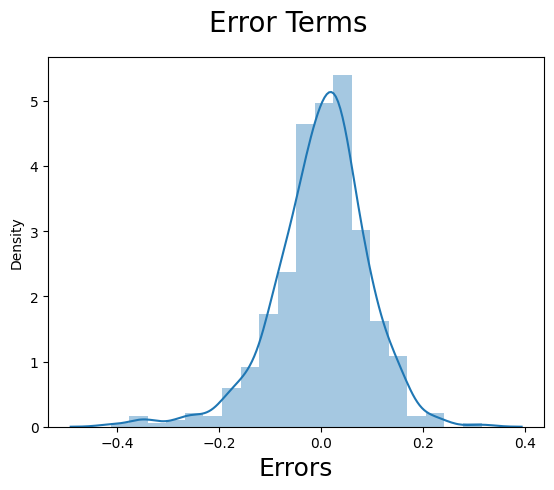

In [182]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [183]:
#Looks normal distribution in Error Terms

In [184]:
calculateVIF(X_train_new.astype(float))

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_snowrain,1.08


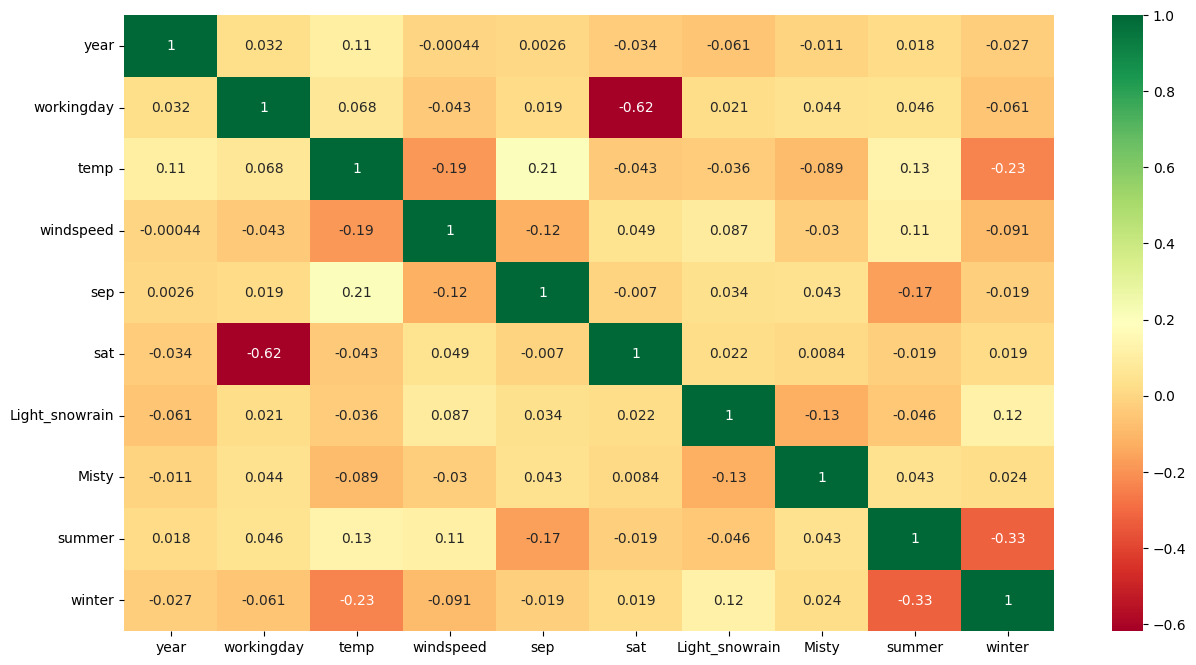

In [185]:
# Check Multicollinearity from Heatmap

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

## **Making Predictions:**

In [186]:
# Applying scaling on the test dataset

# List of numerical variables:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

# Fitting a scaler on test set[num_vars]:
bikesharingdf_test[num_vars] = scaler.transform(bikesharingdf_test[num_vars])

bikesharingdf_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [187]:
# Splitting test set into X_test and y_test:
y_test = bikesharingdf_test.pop('cnt')
X_test = bikesharingdf_test

In [188]:
# Adding the columns which were used to train the final model:
col1 = X_train_new.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [189]:
y_pred = lr_6.predict(X_test_lm_6)

In [190]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7961

# **Model Evaluation**

Text(0, 0.5, 'y_pred')

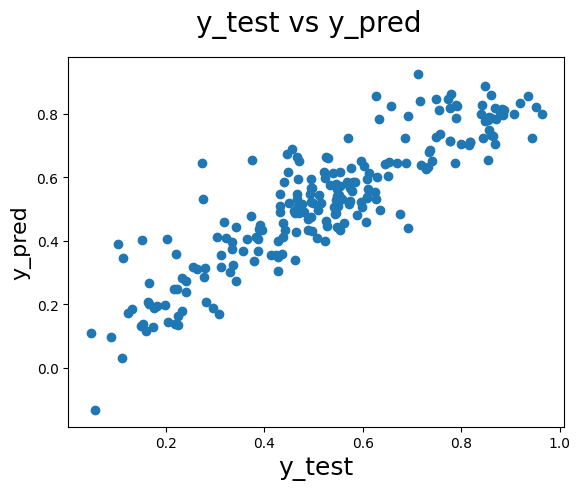

In [191]:
# Plotting y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [192]:
round(lr_6.params,4)

const             0.0750
year              0.2331
workingday        0.0561
temp              0.5499
windspeed        -0.1552
sep               0.0974
sat               0.0675
Light_snowrain   -0.2871
Misty            -0.0800
summer            0.0886
winter            0.1307
dtype: float64

In [193]:
vif_param = pd.DataFrame(round(lr_6.params,4))
vif_param.insert(0,'Variables',vif_param.index)
vif_param.rename(columns = {0:'Coefficient'},inplace = True)
vif_param.sort_values(by = 'Coefficient',ascending = False,inplace = True)
vif_param

,Variables,Coefficient
temp,temp,0.5499
year,year,0.2331
winter,winter,0.1307
sep,sep,0.0974
summer,summer,0.0886
const,const,0.0750
sat,sat,0.0675
workingday,workingday,0.0561
Misty,Misty,-0.0800
windspeed,windspeed,-0.1552


### Adjusted RSquared

In [194]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


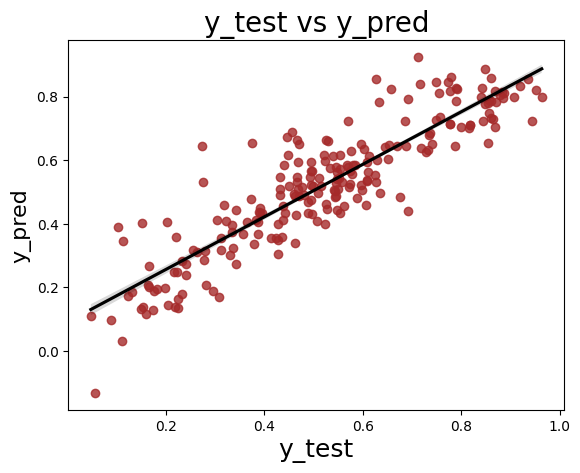

In [195]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test.astype(float), y=y_pred.astype(float), ci=68, fit_reg=True,scatter_kws={"color": "brown"}, line_kws={"color": "black"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# **Conclusion:**

- The R-squared value of the Linear Regression model is 83.5%.
- The equation of **best fit line**

 > **$cnt = 0.0750 + temp*0.549 + year*0.233 + winter*0.1307+ sep*0.0974 + summer*0.0886 + sat*0.0675 + workingday*0.0561 - Misty*0.0800 - windspeed*0.1552 - Light_snowrain*0.2871$**

- Temperature and year are the major driving factors to predict the count.
- Independence of residuals can be observed
- The count of bike rentals decreases in July, Spring season and Weathersit is moderate or high.
- If the positive coefficent of the factor increases, the count of the rental also increases and if the negative coefficent of the factor increases, the count of the rental decreases.
